# ASHITA K
# BEGINNER LEVEL TASK 3:
# 3) Music Recommendation

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

# Importing the datasets

In [2]:
members = pd.read_csv('members.csv')

In [3]:
songs = pd.read_csv('songs.csv')

In [4]:
train = pd.read_csv('train.csv')

In [5]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [6]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [7]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [8]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [9]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [11]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [12]:
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [13]:
train.describe()

,target
count,7.377418e+06
mean,5.035171e-01
std,4.999877e-01
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+00


In [14]:
members.shape

(34403, 7)

In [15]:
songs.shape

(2296320, 7)

In [16]:
train.shape

(7377418, 6)

# Data Visualization

<AxesSubplot:xlabel='registered_via', ylabel='count'>

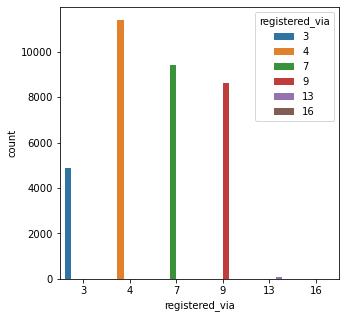

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(x='registered_via', hue='registered_via', data=members)

<AxesSubplot:xlabel='language', ylabel='count'>

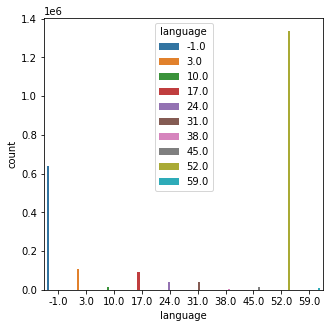

In [18]:
plt.figure(figsize=(5,5))
sns.countplot(x='language', hue='language', data=songs)

<AxesSubplot:xlabel='source_system_tab', ylabel='count'>

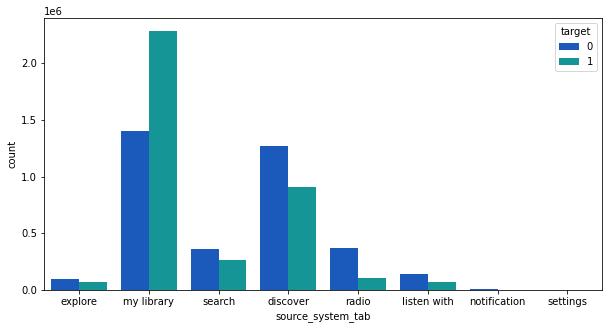

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='source_system_tab', hue='target', data=train, palette='winter')

<AxesSubplot:xlabel='source_system_tab', ylabel='count'>

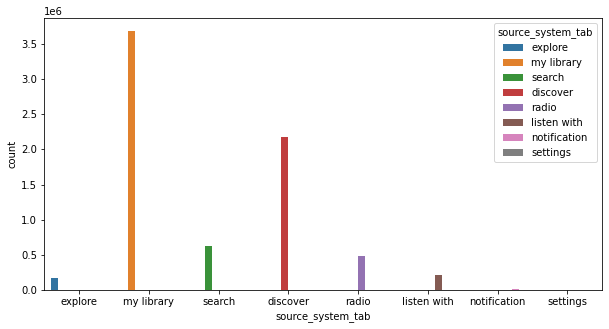

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='source_system_tab', hue='source_system_tab', data=train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'online-playlist'),
  Text(1, 0, 'local-playlist'),
  Text(2, 0, 'local-library'),
  Text(3, 0, 'top-hits-for-artist'),
  Text(4, 0, 'album'),
  Text(5, 0, 'song-based-playlist'),
  Text(6, 0, 'radio'),
  Text(7, 0, 'song'),
  Text(8, 0, 'listen-with'),
  Text(9, 0, 'artist'),
  Text(10, 0, 'topic-article-playlist'),
  Text(11, 0, 'my-daily-playlist')])

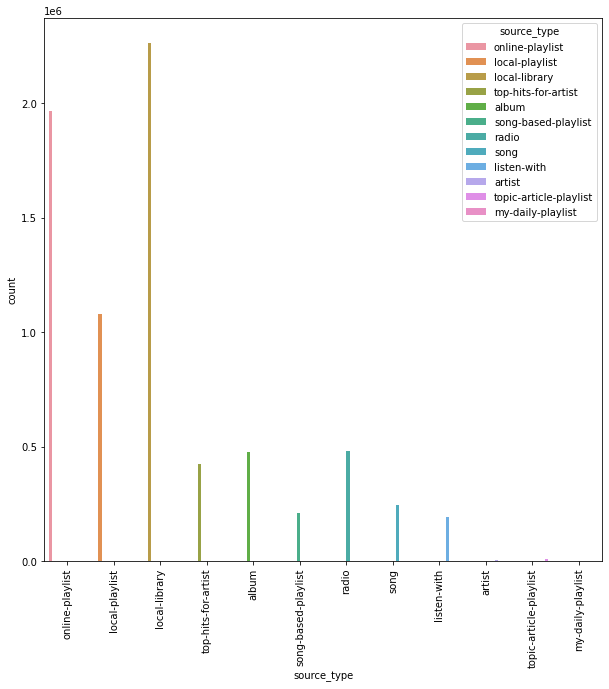

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(x='source_type', hue='source_type',data=train)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Explore'),
  Text(1, 0, 'Local playlist more'),
  Text(2, 0, 'My library'),
  Text(3, 0, 'Online playlist more'),
  Text(4, 0, 'Album more'),
  Text(5, 0, 'Discover Feature'),
  Text(6, 0, 'Unknown'),
  Text(7, 0, 'Discover Chart'),
  Text(8, 0, 'Radio'),
  Text(9, 0, 'Artist more'),
  Text(10, 0, 'Search'),
  Text(11, 0, 'Others profile more'),
  Text(12, 0, 'Search Trends'),
  Text(13, 0, 'Discover Genre'),
  Text(14, 0, 'My library_Search'),
  Text(15, 0, 'Search Home'),
  Text(16, 0, 'Discover New'),
  Text(17, 0, 'Self profile more'),
  Text(18, 0, 'Concert'),
  Text(19, 0, 'Payment')])

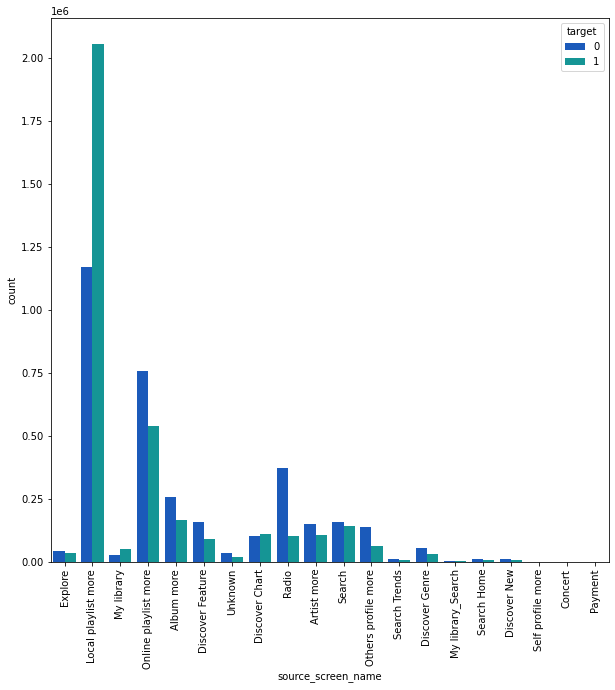

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(x='source_screen_name', hue='target',data=train, palette='winter')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'online-playlist'),
  Text(1, 0, 'local-playlist'),
  Text(2, 0, 'local-library'),
  Text(3, 0, 'top-hits-for-artist'),
  Text(4, 0, 'album'),
  Text(5, 0, 'song-based-playlist'),
  Text(6, 0, 'radio'),
  Text(7, 0, 'song'),
  Text(8, 0, 'listen-with'),
  Text(9, 0, 'artist'),
  Text(10, 0, 'topic-article-playlist'),
  Text(11, 0, 'my-daily-playlist')])

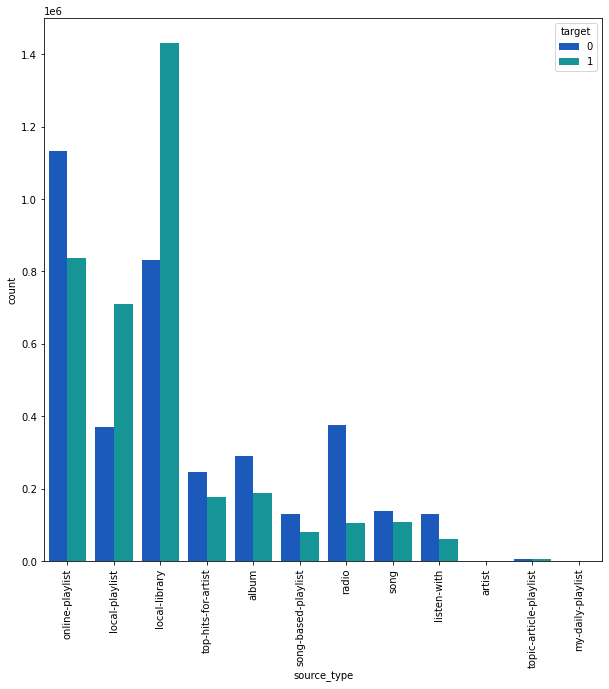

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(x='source_type', hue='target',data=train, palette='winter')
plt.xticks(rotation=90)

# Cleaning of Data

In [24]:
ntr = 7000
nts = 3000
names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test1 = pd.read_csv('train.csv',names=names,skiprows=ntr,nrows=nts)
test = test1.drop(['target'],axis=1)
ytr = np.array(test1['target'])
test_name = ['id','msno','song_id','source_system_tab','source_screen_name','source_type']
test['id']=np.arange(nts)
test = test[test_name]

In [25]:
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

In [26]:
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

In [27]:
members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')

In [28]:
train = train.fillna(-1)
test = test.fillna(-1)

In [29]:
import gc
del members, songs; gc.collect();

In [30]:
cols = list(train.columns)
cols.remove('target')

In [31]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(cols):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|██████████| 19/19 [00:35<00:00,  1.86s/it]


In [32]:
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})
train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

# Building of model

In [33]:
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values
X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values
del train, test; gc.collect();
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state = 12)
del X, y; gc.collect();
d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid) 
watchlist = [d_train, d_valid]

In [34]:
def predict(m1_model):
    model = m1_model.fit(X_train,y_train)
    print('Training Score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_valid)
    v_test = model.predict(X_test)
    yhat = (v_test>0.5).astype(int)
    comp = (yhat==ytr).astype(int)
    acc = comp.sum()/comp.size*100
    print("Accuracy on test data for the model", acc)

In [35]:
predict(LogisticRegression())

Training Score : 0.5121212239874355
Accuracy on test data for the model 63.56666666666667


# Prediction using lightgbm

In [36]:
params = {}
params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'
model1 = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist, early_stopping_rounds=10, verbose_eval=10)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.709397 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 10 rounds
[10]	training's auc: 0.711178	valid_1's auc: 0.710232
[20]	training's auc: 0.730905	valid_1's auc: 0.728782
[30]	training's auc: 0.741549	valid_1's auc: 0.738609
[40]	training's auc: 0.749137	valid_1's auc: 0.745402
[50]	training's auc: 0.756133	valid_1's auc: 0.751662
[60]	training's auc: 0.762364	valid_1's auc: 0.757353
[70]	training's auc: 0.766309	valid_1's auc: 0.760607
[80]	training's auc: 0.771415	valid_1's auc: 0.76515
[90]	training's auc: 0.775364	valid_1's auc: 0.768509
[100]	training's auc: 0.778289	valid_1's auc: 0.770738
[110]	training's auc: 0.781535	valid_1's auc: 0.773422
[120]	training's auc: 0.784836	valid_1's auc: 0.776062
[130]	training's auc: 0.78777	valid_1's auc: 0.778502
[140]	training's auc: 0.790916	valid_1's auc: 0.780955
[150]	training'

In [37]:
p_test = model1.predict(X_test)
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum()/comp.size*100
print('The accuracy of lgbm model on test data is: {0:f}%'.format(acc))

The accuracy of lgbm model on test data is: 82.666667%
